#### Importing the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

import matplotlib.pyplot as plt 


C:\Users\khain\AppData\Local\Temp\ipykernel_18256\264531854.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])


In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")


Finished training the model


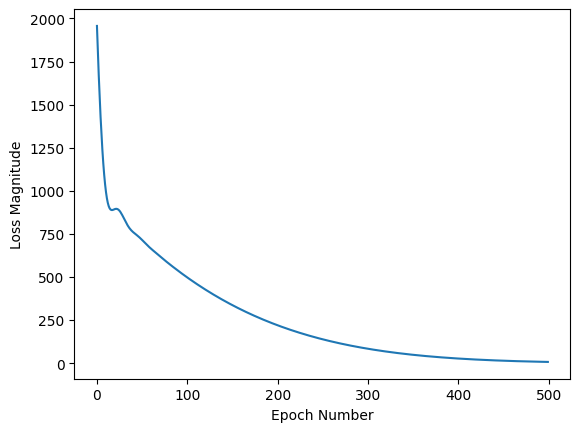

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [9]:
print(model.predict([100]))

1/1 [==============================] - 0s 53ms/step
[[211.33293]]


Ok, now then write a linear regression problem for How does advertising spending affect revenue for a business by generation some synthetic data that simulates the relationship between advertising spending and sales revenue for a business.

In [38]:
#Generate synthetic data
np.random.seed(123) ## assign seed number to get the exact random values whenever we run

no_of_observation=300
spending_on_advertising=np.random.uniform(0,1000,no_of_observation)
sales_revenue= 100 + 0.5*spending_on_advertising +np.random.normal(0,50,no_of_observation)

In [39]:
#Create DataFrame
advert_to_revenue=pd.DataFrame({"Advertising_cost":spending_on_advertising,
                                "Revenue":sales_revenue})
advert_to_revenue

,Advertising_cost,Revenue
0,696.469186,470.028381
1,286.139335,227.121818
2,226.851454,244.950128
3,551.314769,268.032712
4,719.468970,386.478674
...,...,...
295,940.029015,601.611922
296,832.716197,460.606101
297,846.054838,450.493262
298,123.923010,138.334975


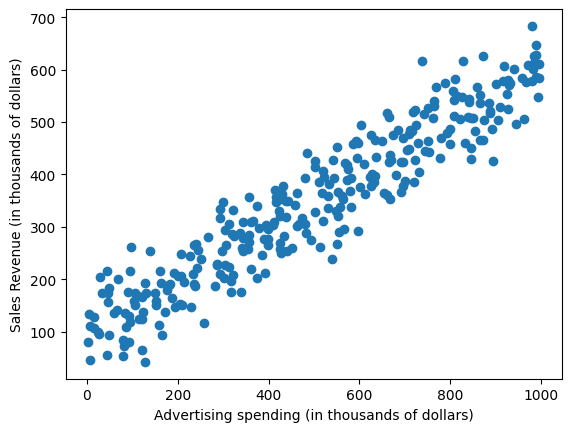

In [40]:
#Plot the graph of relationship between spending on advertistments to sales revenue
plt.scatter(spending_on_advertising,sales_revenue)
plt.xlabel("Advertising spending (in thousands of dollars)")
plt.ylabel("Sales Revenue (in thousands of dollars)")
plt.show()

In [ ]:

# Plot the data
plt.scatter(x, y)
plt.xlabel("Advertising spending (in thousands of dollars)")
plt.ylabel("Sales revenue (in thousands of dollars)")
plt.show()

# Define the linear model equation
def linear_model(x, b0, b1):
  return b0 + b1 * x

# Define the mean squared error cost function
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# Initialize the model parameters randomly
b0 = np.random.randn()
b1 = np.random.randn()

# Set the learning rate and the number of iterations
alpha = 0.001
epochs = 1000

# Create lists to store the cost and the parameters values at each iteration
cost_history = []
b0_history = []
b1_history = []

# Write a loop to update the model parameters using gradient descent
for i in range(epochs):
  # Predict the revenue using the current model parameters
  y_pred = linear_model(x, b0, b1)

  # Calculate the cost
  cost = mse(y, y_pred)

  # Calculate the gradients
  b0_grad = -2 * np.mean(y - y_pred)
  b1_grad = -2 * np.mean(x * (y - y_pred))

  # Update the parameters
  b0 = b0 - alpha * b0_grad
  b1 = b1 - alpha * b1_grad

  # Store the cost and the parameters values
  cost_history.append(cost)
  b0_history.append(b0)
  b1_history.append(b1)

  # Print the cost and the parameters values every 100 iterations
  if (i + 1) % 100 == 0:
    print("Iteration:", i + 1)
    print("Cost:", cost)
    print("b0:", b0)
    print("b1:", b1)
    print()

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Plot the final regression line
plt.scatter(x, y)
plt.plot(x, linear_model(x, b0, b1), c="red")
plt.xlabel("Advertising spending (in thousands of dollars)")
plt.ylabel("Sales revenue (in thousands of dollars)")
plt.show()

# Print the final model coefficients
print("Final model coefficients:")
print("b0:", b0)
print("b1:", b1)

# Predict the revenue for a new advertising spending
new_advertising = 50 # in thousands of dollars
new_revenue = linear_model(new_advertising, b0, b1)
print("Predicted revenue for", new_advertising, "thousand dollars of advertising spending:", new_revenue, "thousand dollars")
